<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#f25625">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Temas Selectos de Ingeniería en Computación III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-1</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#f25625">Laboratorio 4: Algoritmos Cuánticos II</font></td>
    </tr>
</table>

<p style="text-align:right; font-weight:bold;">Autora: Claudia Zendejas-Morales</p>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

## Contenido

1. [Introducción](#1)
   1. [Tiempo de ejecución](#1.1)
   2. [Algoritmos para computadoras cuánticas](#1.2)
   3. [El stack cuántico](#1.3)
2. [Repaso: Orden de los qubits](#2)
3. [Algoritmos Cuánticos II](#3)
   1. [Algoritmo de Deutsch](#3.1)
      1. [El problema](#3.1.1)
      2. [Modelo de computación de Oráculo](#3.1.2)
      3. [Solución clásica](#3.1.3)
      4. [Solución cuántica](#3.1.4)
      5. [Algoritmo](#3.1.5)
      6. [Phase Kickback](#3.1.6)
      7. [Continuando con el algoritmo](#3.1.7)
      8. [Código en Qiskit](#3.1.8)
   2. [Algoritmo de Deutsch – Jozsa](#3.2)
      1. [El problema](#3.2.1)
      2. [Solución clásica](#3.2.2)
      3. [Solución cuántica](#3.2.3)
      4. [Algoritmo](#3.2.4)
      5. [¿Por qué funciona?](#3.2.5)
      6. [[Extra] Descripción del oráculo balanceado y resultados para $n=3$](#3.2.6)
4. [Repaso: Hadamard](#4)
5. [Práctica 4](#5)

<a id="1"></a>
# 1. Introducción

<a id="1.1"></a>
## 1.1. Tiempo de ejecución

El objetivo general de los algoritmos es resolver tareas computacionales de manera eficiente, donde el tiempo de ejecución escala polinomialmente con el tamaño de la entrada 
$n$. Estas tareas pertenecen a la clase de complejidad $𝑃$. En la computación cuántica, la clase correspondiente es [BQP](https://en.wikipedia.org/wiki/BQP), (Tiempo Polinomial Cuántico de Error Acotado, Bounded-error Quantum Polynomial), que incluye problemas que una computadora cuántica puede resolver en tiempo polinomial.


Es importante mencionar que **las computadoras cuánticas no aceleran todos los problemas computacionales de manera uniforme**. Problemas [$NP$-completos](https://en.wikipedia.org/wiki/NP-completeness), descritos como buscar una aguja en un pajar, **requieren un tiempo exponencial para ser resueltos con algoritmos cuánticos en el modelo de caja negra**, según demostraron [Bennett et al](https://arxiv.org/abs/quant-ph/9701001). Esto implica que no es probable que las computadoras cuánticas proporcionen aceleraciones exponenciales para estos problemas. Específicamente, encontrar una solución en un conjunto de tamaño $N$ requiere al menos $N^{1/2}$ pasos, como demostró Grover.

Los problemas $NP$-completos, los más difíciles dentro de $NP$, incluyen problemas famosos como el problema del vendedor viajero ([TSP, Travelling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)). Se conjetura ampliamente que $P\neq NP$, lo que implica que resolver problemas $NP$-completos requeriría un tiempo exponencial $e^n$ en cualquier algoritmo clásico. Esta es una de las cuestiones más importantes en la teoría de la computación y uno de los siete [Problemas del Milenio](https://en.wikipedia.org/wiki/Millennium_Prize_Problems)).

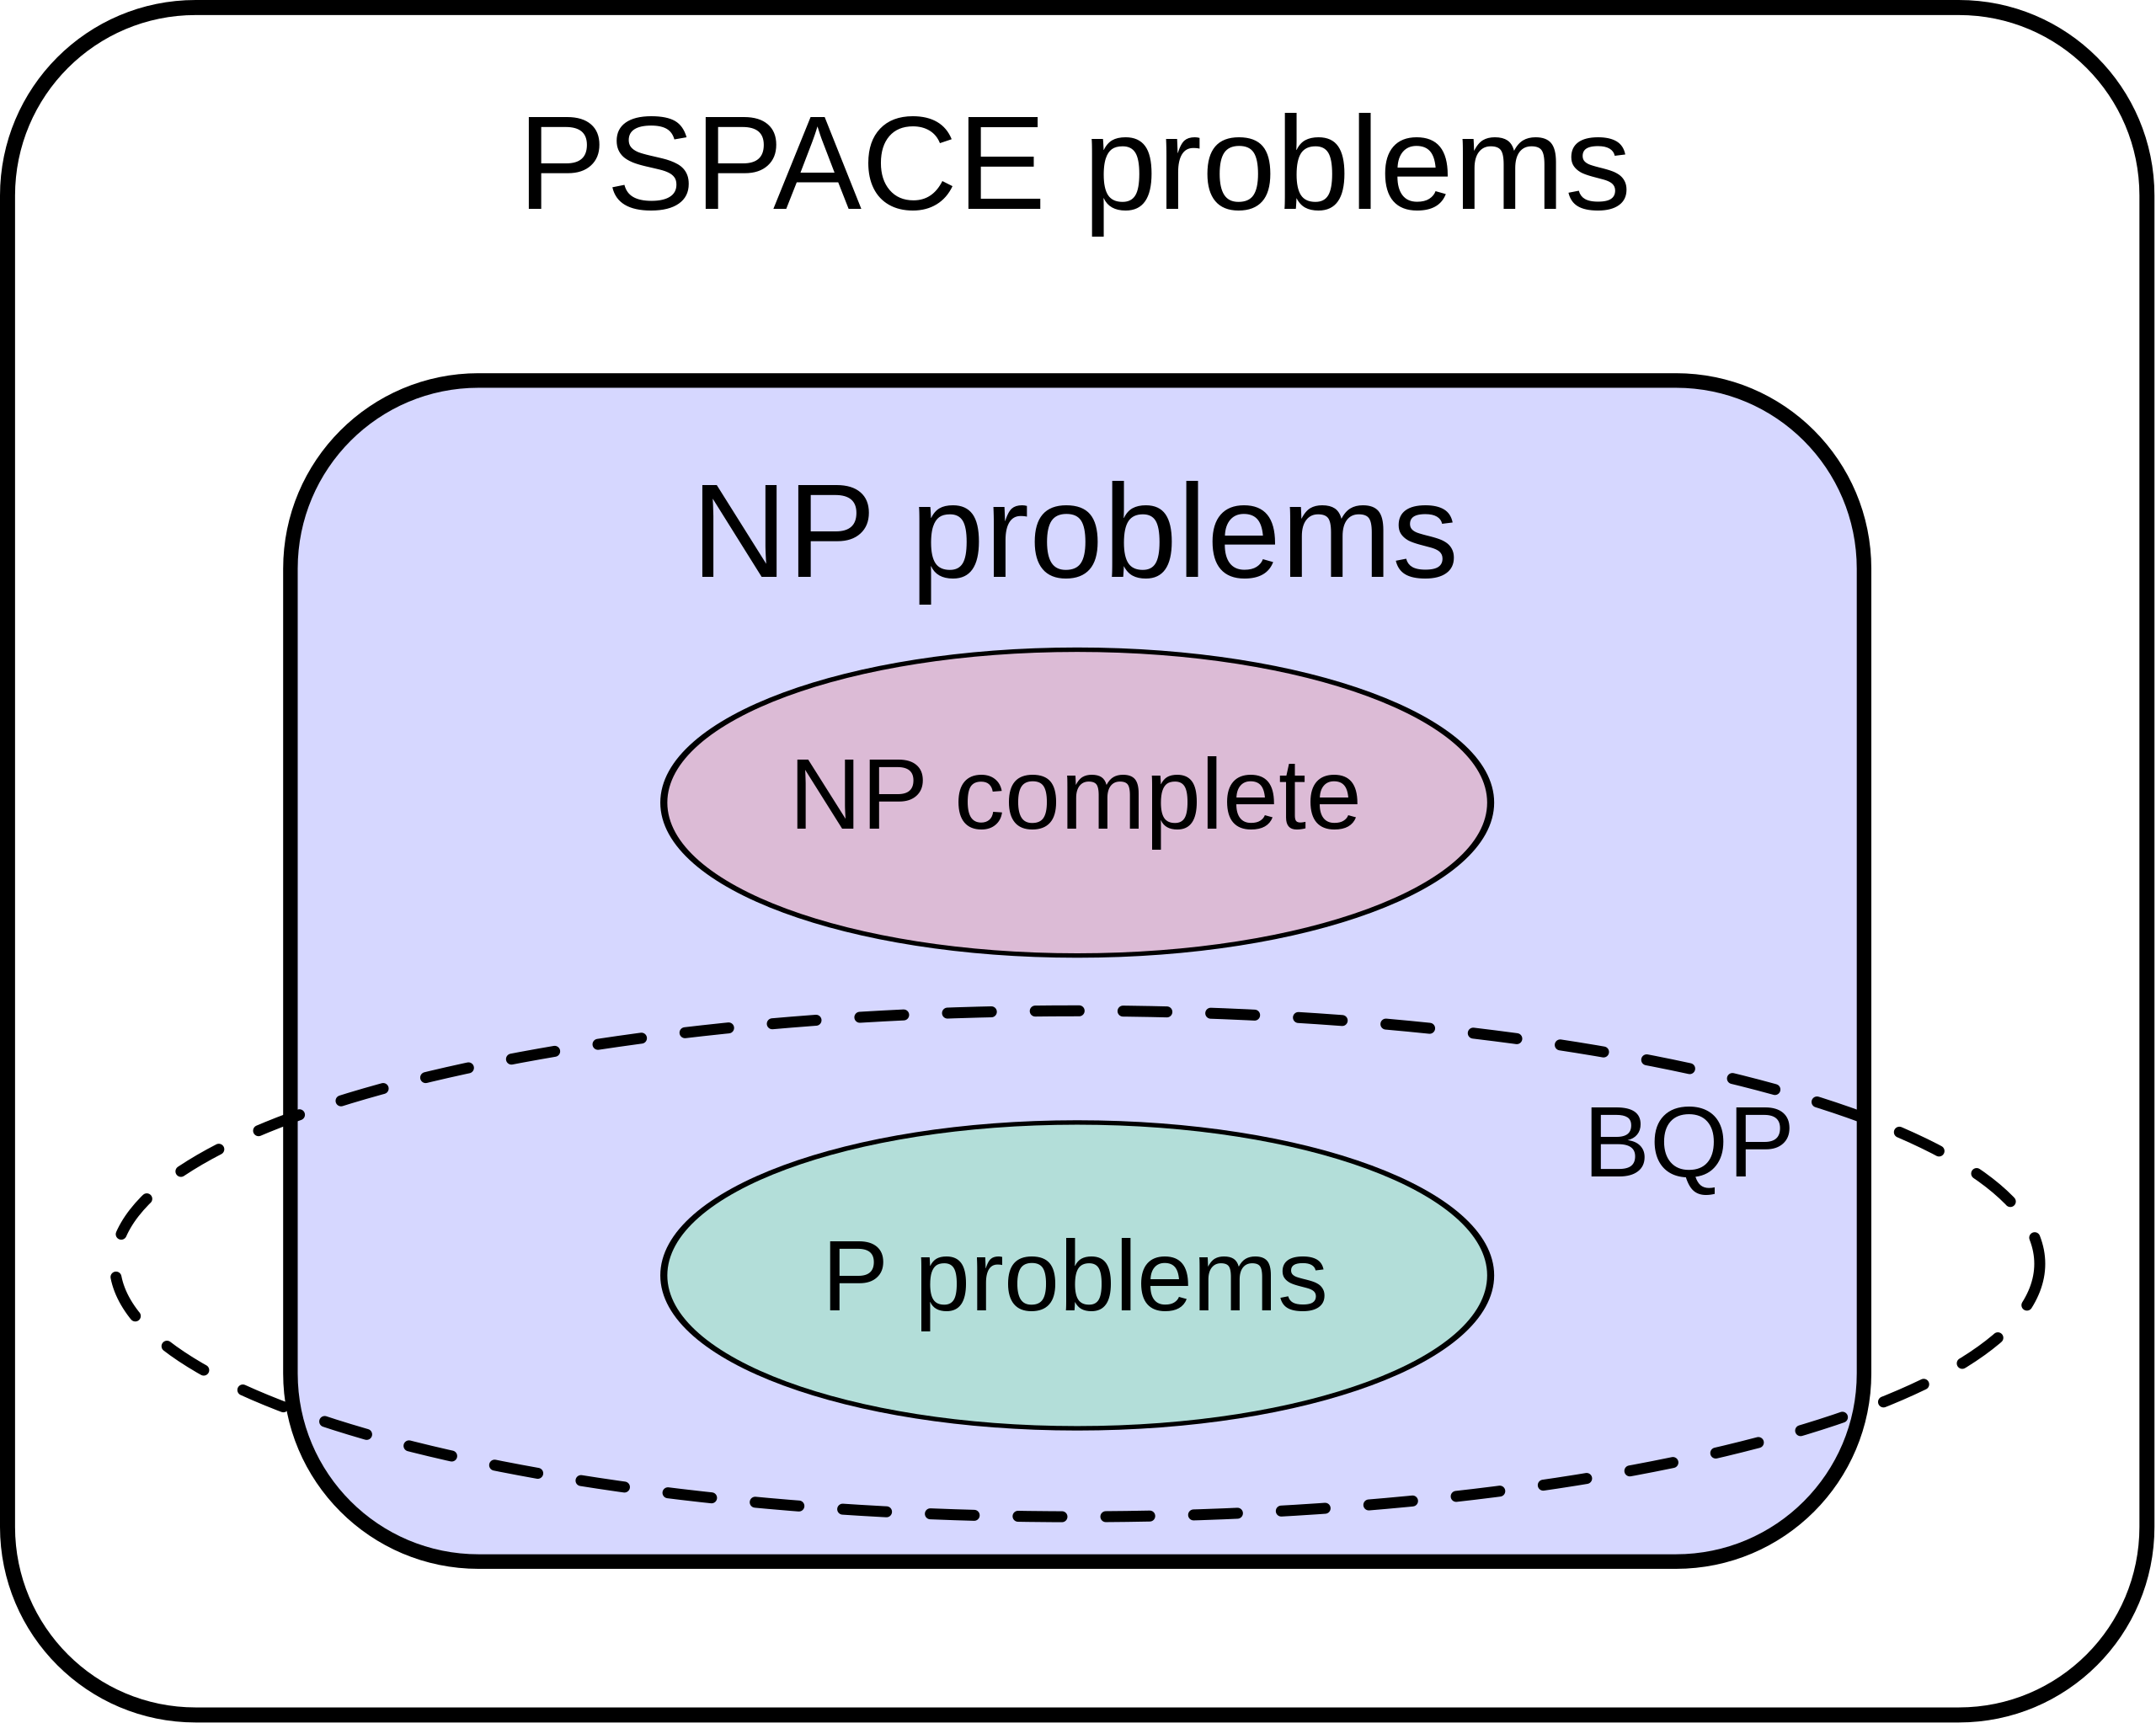

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://en.wikipedia.org/wiki/BQP" target="_blank">Imagen obtenida de Wikipedia</a></p>

<a id="1.2"></a>
## 1.2. Algoritmos para computadoras cuánticas

El diseño de los **algoritmos cuánticos** sigue principios completamente diferentes a los de los algoritmos clásicos. Incluso los algoritmos clásicos, al pasarlos a su versión cuántica, deben moldearse en una forma especial, como **algoritmos reversibles**, antes de que puedan ejecutarse en una computadora cuántica. Los algoritmos que logran aceleraciones cuánticas usan ciertos paradigmas algorítmicos cuánticos o bloques de construcción que no tienen contrapartes clásicas.

Hay una extensa literatura sobre algoritmos cuánticos desarrollada en el último cuarto de siglo. Estos algoritmos se basan en componentes básicos cuánticos y están diseñados para ejecutarse en una computadora cuántica ideal. Los dispositivos cuánticos reales son ruidosos, por lo que se ha desarrollado una teoría elaborada de **códigos de corrección de errores cuánticos** y **computación cuántica tolerante a fallas** para convertir computadoras cuánticas ruidosas en ideales. Sin embargo, esto genera una sobrecarga tanto en la cantidad de qubits como en el tiempo de ejecución.

El campo ahora está en la era de los dispositivos cuánticos ruidosos de escala intermedia ([NISQ](https://en.wikipedia.org/wiki/Noisy_intermediate-scale_quantum_era) (Noisy Intermediate-Scale Quantum)), con computadoras cuánticas que son lo suficientemente grandes (decenas a cientos o unos pocos miles de qubits) para no ser simuladas de manera eficiente por una computadora clásica, pero que no son tolerantes a fallas. Si bien el interés y la financiación han avanzado el desarrollo de computadoras cuánticas tolerantes a fallas y escalables, aún queda mucho trabajo por hacer.

Los **mayores desafíos futuros son algorítmicos**; a corto plazo, esto incluye la búsqueda de tareas computacionales que las computadoras cuánticas puedan acelerar. Desarrollar algoritmos para computadoras NISQ es tan importante como crear los dispositivos físicos. A largo plazo, queda mucho trabajo en el campo de los algoritmos cuánticos para computadoras cuánticas ideales. Describiremos algunos bloques de construcción de los algoritmos cuánticos y los algoritmos conocidos para computadoras cuánticas idealizadas que proporcionan aceleraciones sobre los mejores algoritmos clásicos.

El poder de los algoritmos cuánticos se deriva de la complejidad exponencial de los sistemas cuánticos: el estado de un sistema de $n$ qubits entrelazados se describe mediante $N = 2^n$ coeficientes complejos. La aplicación de cada compuerta elemental en, digamos, dos qubits actualiza los $2^n$ números complejos que describen el estado, realizando $2^n$ cálculos en un solo paso. Sin embargo, al final del cálculo, la medición de los $n$ qubits produce solo $n$ bits clásicos. El desafío es **encontrar tareas que usen este paralelismo y produzcan un estado cuántico final con alta probabilidad de devolver información valiosa tras la medición**. Los enfoques exitosos aprovechan la **interferencia cuántica** para generar resultados útiles.

<a id="1.3"></a>
## 1.3. El stack cuántico

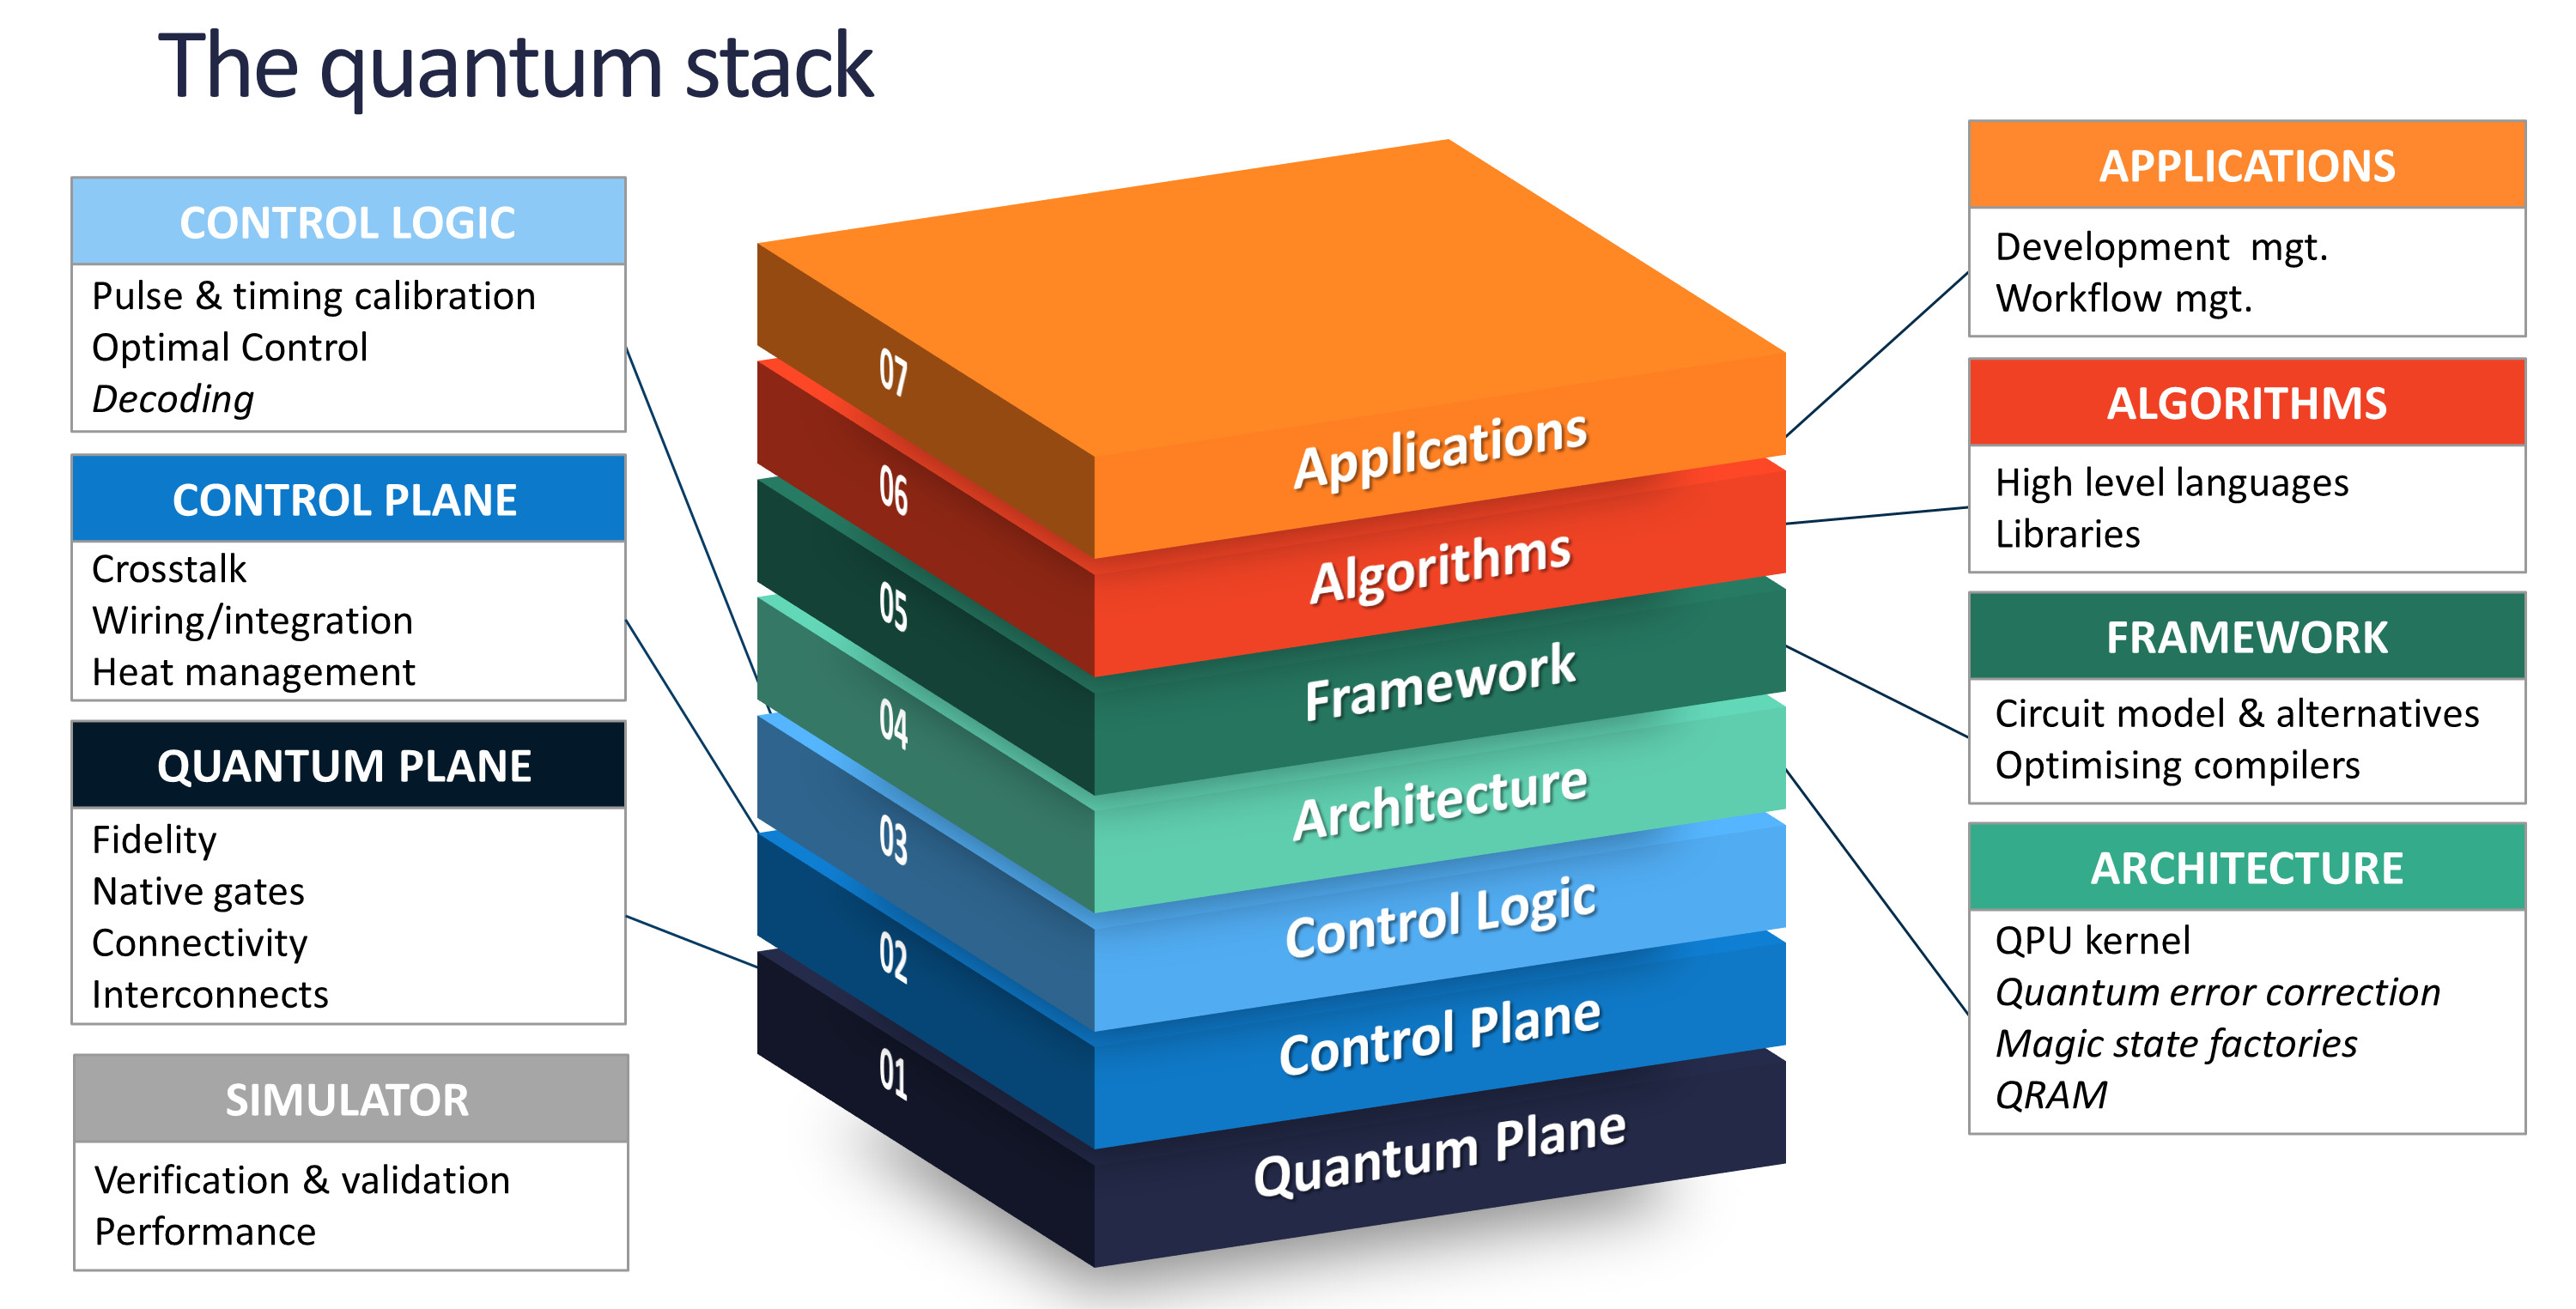

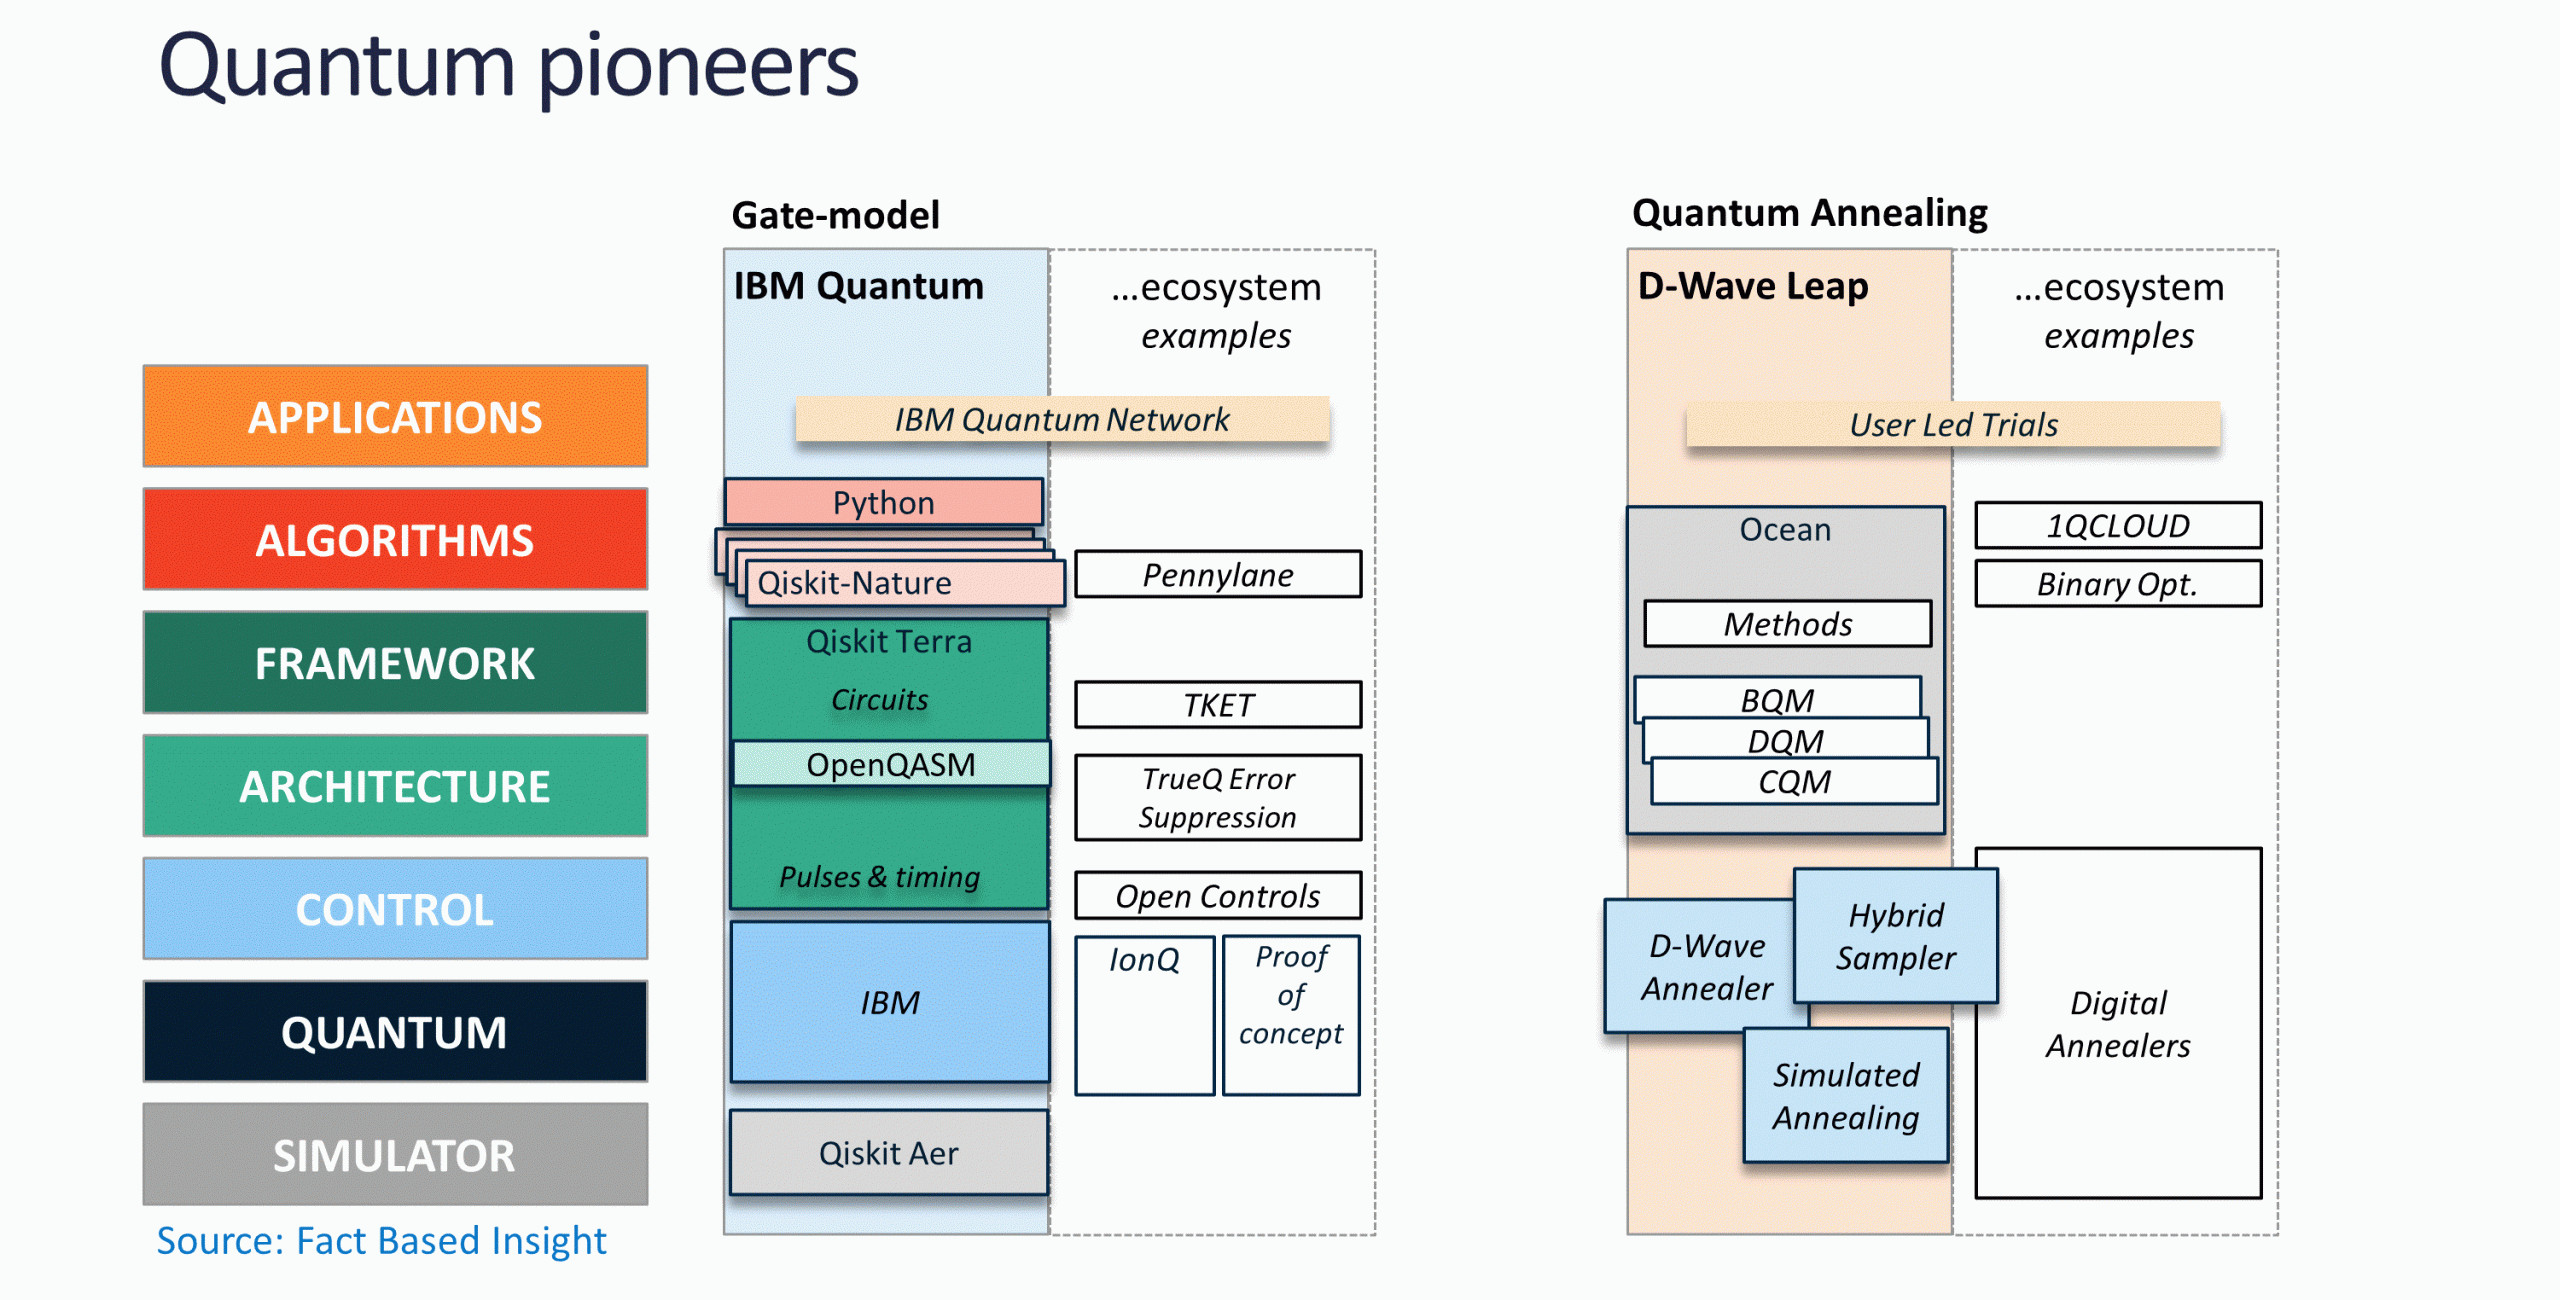

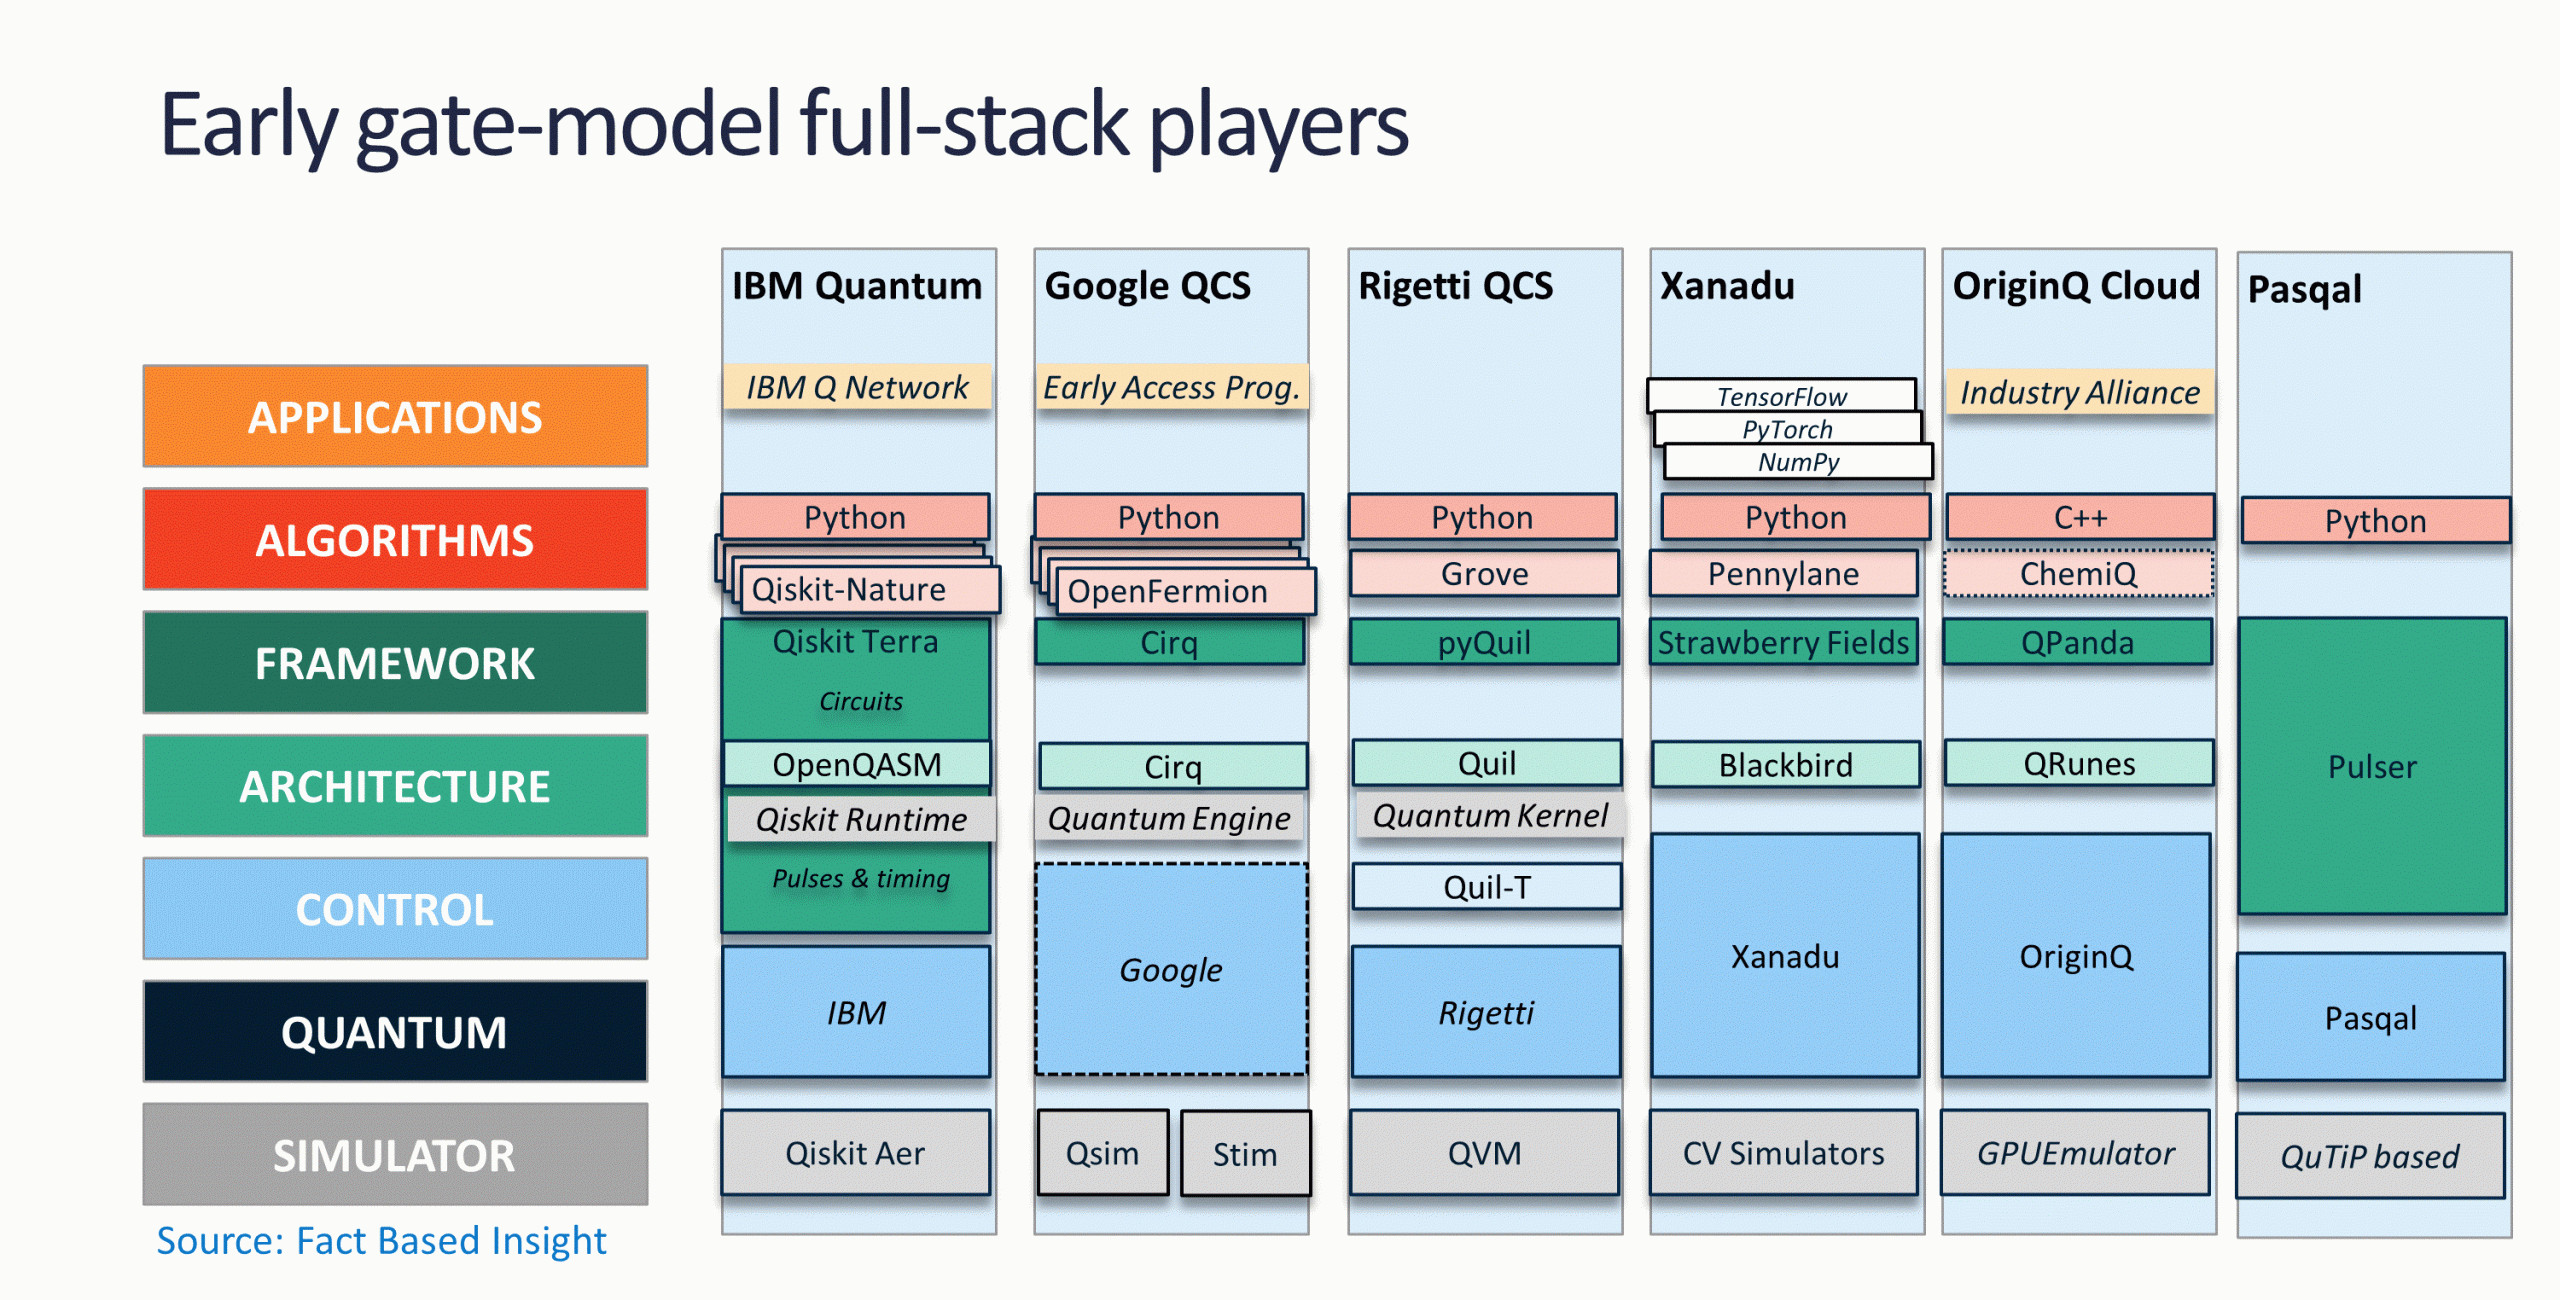

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://www.factbasedinsight.com/quantum-software-outlook-2022/" target="_blank">Imágenes obtenidas de Fact Based Insight</a></p>

<a id="2"></a>
# 2. Repaso: Orden de los qubits

## Convenciones históricas
En la computación clásica y la representación binaria, el dígito más a la derecha es el bit menos significativo (least significant bit, LSB) y el dígito más a la izquierda es el bit más significativo (most significant bit, MSB). Sin embargo, cuando se desarrolló la computación cuántica, varios grupos e investigadores adoptaron diferentes convenciones. Algunos siguieron de cerca el enfoque clásico, mientras que otros optaron por representaciones que tenían más sentido para sus formulaciones matemáticas o diseños de hardware.

## Convención de Qiskit
Qiskit, adopta la convención según la cual el qubit más a la derecha es el qubit menos significativo, lo cual es algo análogo al ordenamiento de bits clásico pero a la inversa de la forma en que muchos textos de computación cuántica presentan los estados de los qubits. En concreto, en Qiskit:

$$\ket{q_2 \, q_1 \, q_0}=\ket{001}$$

<p style="text-align: center;">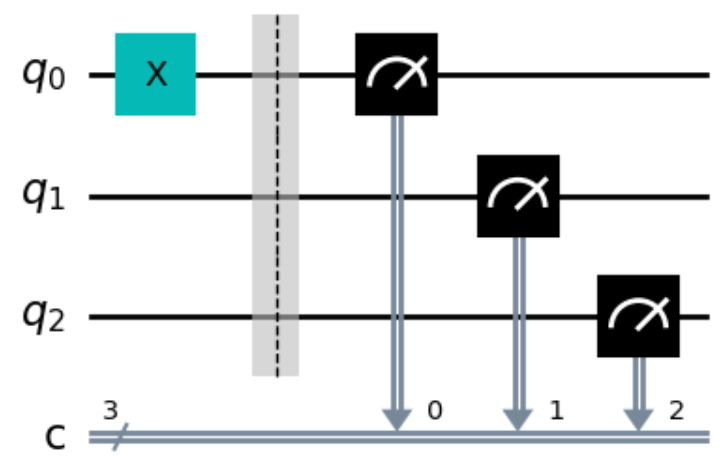
</p>

El estado $\ket{q_2 \, q_1 \, q_0}$ significa que $q_0$ es el qubit menos significativo, lo que afecta a la parte más pequeña de la representación del vector de estado, y $q_2$ es el qubit más significativo.

Esta convención se elige para alinear la representación binaria con los índices de un vector de estado en estados de base computacional. Por ejemplo, el número binario $001$ en esta notación se refiere al estado donde $q_2=0$, $q_1=0$ y $q_0=1$, que corresponde al índice $1$ en el vector de estado (asumiendo una indexación de base cero).

**El espacio de 3 qubits**, implica que $n=3$, por lo que, tenemos que la dimensión es $2^3=8$, entonces el vector de estado para este espacio de Hilbert, en la base computacional, del ejemplo $\ket{001}$ es:

$$\ket{001}=\ket{0}\otimes\ket{0}\otimes\ket{1}=\mymatrix{r}{1 \\ 0}\otimes\mymatrix{r}{1 \\ 0}\otimes\mymatrix{r}{0 \\ 1}=\mymatrix{r}{ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 } $$

**Qiskit utiliza [little-endian](https://en.wikipedia.org/wiki/Endianness)** tanto para el ordenamiento de bits clásicos como para el ordenamiento de qubits.

- **Bits clásicos**: Un registro clásico de 3 bits `creg` con valor `abc` tiene `creg[0]=c`, `creg[1]=b`, `creg[2]=a`.

- **Qubits**: Un registro cuántico de 3 qubits `qreg` con función de onda $\ket{\psi}=\ket{A\otimes B\otimes C}=\ket{ABC}$ tiene `qreg[0]`=$\ket{C}$, `qreg[1]`=$\ket{B}$, `qreg[2]`=$\ket{A}$.

- Lo mismo ocurre con la representación de matrices unitarias de un circuito.
$U=U_A\otimes U_B\otimes U_C=U_AU_BU_C$ tendría $U_C$ actuando sobre `qreg[0]`, $U_B$ actuando sobre `qreg[1]` y $U_A$ actuando sobre `qreg[2]`.

<div class="alert alert-block alert-info">

En **Qiskit**, la nomenclatura utilizada para los qubits sigue una convención **little-endian**, lo que significa que el **qubit menos significativo** (qubit 0) es el que se encuentra en la posición más baja en la representación binaria del estado cuántico; es decir, el **qubit con el índice más bajo** es el menos significativo en la representación del estado del sistema cuántico.

$$ $$

La endianidad (*endianness*) se refiere al orden o secuencia en la que los bytes se organizan en valores numéricos más grandes cuando se almacenan en la memoria de la computadora. Es un concepto que normalmente se aplica a cómo un sistema computacional lee y almacena la secuencia de bytes que componen un tipo de datos:
- Big-endian: el byte más significativo (MSB) de los datos se coloca en el byte con la dirección de memoria más baja. Esto es análogo a cómo escribimos normalmente los números, con el dígito más significativo a la izquierda.
- Little-endian: el byte menos significativo (LSB) se almacena en la dirección de memoria más baja. Esto significa que los bytes se almacenan en orden inverso al que normalmente escribimos los números.

<a id="3"></a>
# 3. Algoritmos Cuánticos II

<a id="3.1"></a>
## 3.1. Algoritmo de Deutsch

El **algoritmo de Deutsch** fue el primer algoritmo que demostró una _ventaja cuántica_: específicamente una reducción en la complejidad de las consultas en comparación con el caso clásico. El algoritmo de Deutsch-Jozsa generaliza el algoritmo de Deutsch y revela la posibilidad de aceleraciones exponenciales utilizando computadoras cuánticas.

<a id="3.1.1"></a>
### 3.1.1. El problema

Dada una función booleana $f:\{0,1\} \rightarrow \{0, 1\}$, decimos que $f$ está balanceada si $f(0) \neq f(1)$ y constante si $f(0) = f(1)$.

Dado $f:\{0,1\} \rightarrow \{0, 1\}$ como un oráculo, es decir, podemos evaluarlo para una entrada haciendo consultas pero no podemos mirar dentro, el problema es decidir si $f$ es **constante o balanceada**.

<a id="3.1.2"></a>
### 3.1.2. Modelo de computación de Oráculo

En el modelo de computación de Oráculo, sólo puedes hacer preguntas como "¿Cuál es el resultado de $f(0)$?" Cada pregunta que haces es una _consulta a la función $f$_.

En la computación cuántica, muchos algoritmos se basan en este modelo de computación de Oráculo (_Oracle_) y el objetivo es resolver algún problema realizando el mínimo de consultas posible.

<a id="3.1.3"></a>
### 3.1.3. Solución clásica

Dada una función de este tipo, necesitamos evaluar la función **dos veces** para obtener una respuesta usando una computadora clásica.

--------------

- $f$ es **constante**: $f(0) = f(1)$

$$f(0)=0~~~~~~~f(1)=0$$

$$ó$$

$$f(0)=1~~~~~~~f(1)=1$$

--------------

- $f$ es: **balanceada**: $f(0) \neq f(1)$

$$f(0)=1~~~~~~~f(1)=0$$

$$ó$$

$$f(0)=0~~~~~~~f(1)=1$$

--------------

<a id="3.1.4"></a>
### 3.1.4. Solución cuántica

Cada función lógica 'clásica' $f$ se puede convertir en un operador unitario equivalente $U_f$ (construyendo un circuito cuántico lógico). Ahora vamos a ver un algoritmo cuántico que evalúa $U_f$ solo **una vez**.

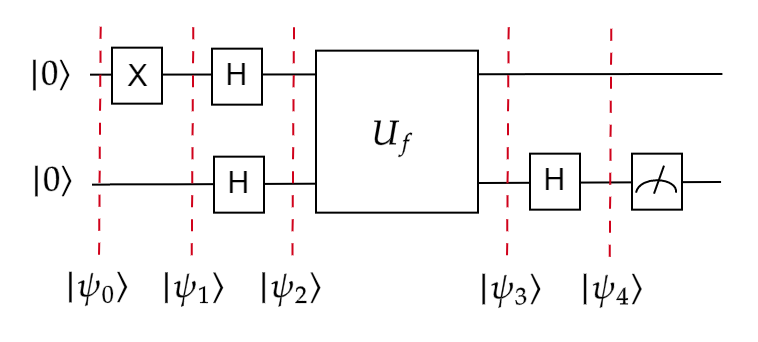

El oráculo $U_f$ implementa la función $f:\{0,1\} \rightarrow \{0, 1\}$ de manera que:

$$U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x) }$$

Donde $\oplus$ representa la [suma módulo 2](https://en.wikipedia.org/wiki/Modular_arithmetic).

<a id="3.1.5"></a>
### 3.1.5. Algoritmo

Construimos un circuito de 2 qubits.

- Establecemos el segundo qubit ($q_0$) en el estado $\ket{-}$ aplicando las compuertas $X$ y $H$.

- Aplicar $H$ al primer qubit ($q_1$).

- Aplicar $U_f$.

- Aplicar $H$ al primer qubit.

- Medir el primer qubit. Si es $0$ entonces $f$ es constante. Si es $1$, entonces $f$ está balanceada.

#### Pasos

Comenzamos con el estado inicial $\ket{\psi_0} = \ket{0}\ket{0}$. A continuación aplicamos una compuerta $X$ al segundo qubit y obtenemos el estado $\ket{\psi_1} = \ket{0}\ket{1}.$

Después de aplicar $H$ a ambos qubits, el primer qubit está en el estado de superposición y el segundo qubit ahora está en el estado $\ket{-}$.

\begin{align*}
\ket{\psi_2} &= \left(\frac{1}{\sqrt{2}}\ket{0} +\frac{1}{\sqrt{2}}\ket{1} \right) \ket{-} \\
&= \frac{1}{\sqrt{2}}\ket{0}\ket{-}  +\frac{1}{\sqrt{2}}\ket{1}\ket{-} \\
\hspace{-2in}\\
\end{align*}

A continuación aplicamos $U_f$ a $\ket{\psi_2}$ y obtenemos $\ket{\psi_3}$

\begin{align*}
\\\ket{\psi_3} &= U_f\left(\frac{1}{\sqrt{2}}\ket{0}\ket{-}+\frac{1}{\sqrt{2}}\ket{1}\ket{-}\right) \\
&= \frac{1}{\sqrt{2}}U_f\ket{0}\ket{-}+\frac{1}{\sqrt{2}}U_f\ket{1}\ket{-} &\mbox{ Linealidad del operador} \\
&= \frac{1}{\sqrt{2}}(-1)^{f(0)}\ket{0}\ket{-}+\frac{1}{\sqrt{2}}(-1)^{f(1)}\ket{1}\ket{-}  &\mbox{ Por retroceso de fase (phase kickback)} \\
&= \left(\frac{1}{\sqrt{2}}(-1)^{f(0)}\ket{0}+\frac{1}{\sqrt{2}}(-1)^{f(1)}\ket{1}\right)\ket{-} \\
\\
\end{align*}

<a id="3.1.6"></a>
### 3.1.6. Phase Kickback

Cuando aplicamos un operador $CNOT$, ¡el qubit control se ve afectado!

Este es un efecto cuántico interesante.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: 

Crear un circuito cuántico con dos qubits, digamos $ q[1] $ y $ q[0] $ en el orden de Qiskit.

Empezamos en el estado cuántico $ \ket{01} $:
- establecer el estado de $ q[1] $ en $ \ket{0} $, y
- establece el estado de $ q[0] $ en $ \ket{1} $.

Aplicar Hadamard a ambos qubits.

Aplicar el operador $CNOT$, donde el qubit control es $ q[1] $ y el qubit objetivo es $ q[0]$.

Aplicar Hadamard a ambos qubits.

Medir los resultados.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

q = QuantumRegister(2, "q")
c = ClassicalRegister(2, "res")
qc = QuantumCircuit(q, c)
                                    # el qubit inferior está en |0>
qc.x(q[0])                          # colocar al qubit superior en |1>
qc.barrier()
qc.h(q[0])                          # aplicar Hadamard a ambos qubits
qc.h(q[1])
qc.cx(q[1], q[0])                   # aplicar CNOT
qc.h(q[0])                          # aplicar Hadamard a ambos qubits
qc.h(q[1])
qc.barrier()
qc.measure(q, c)                    # medir ambos qubits

display(qc.draw(output='mpl'))

simulator_basic = BasicSimulator()
job = simulator_basic.run(qc)
print(job.result().get_counts())

#### El efecto del $CNOT$

El estado cuántico del qubit de la izquierda (el inferior) antes del $CNOT$:

$$
     \ket{0} \xrightarrow{H} \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}.
$$

El estado cuántico del qubit de la derecha (el superior) antes del $CNOT$:

$$
     \ket{1} \xrightarrow{H} \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}.
$$

El $CNOT$ afecta cuando el qubit de la izquierda (el inferior) tiene el valor $1$.

Reescribamos el estado compuesto como se muestra a continuación para representar explícitamente el efecto del $CNOT$.

\begin{align*}
|\phi_2\rangle&=\left(\frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}\right) \otimes \left(\frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}\right)\\\\
&=\frac{1}{\sqrt{2}} \ket{0} \otimes \left( \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2 }} \ket{1} \right)+
\frac{1}{\sqrt{2}} \ket{1} \otimes \left( \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2 }} \ket{1} \right)
\end{align*}

$$ $$

El $CNOT$ invierte el estado del qubit de la derecha (el superior). Después del $CNOT$ tenemos:

$$
      |\phi_3\rangle=\frac{1}{\sqrt{2}} \ket{0} \otimes \left( \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2 }} \ket{1} \right)
      +
      \frac{1}{\sqrt{2}} \ket{1} \otimes \left( \frac{1}{\sqrt{2}} \ket{1} - \frac{1}{\sqrt{2 }} \ket{0} \right)
$$

Notemos que $\ket{0}$ y $ \ket{1} $ se intercambian en el segundo qubit (el de arriba).

Si escribimos el estado cuántico del qubit superior como antes, el signo de $ \ket{1} $ en el qubit superior debería invertirse.

Por lo tanto, la última ecuación se puede escribir de manera equivalente de la siguiente manera:

\begin{align*}
      |\phi_3\rangle&=\frac{1}{\sqrt{2}} \ket{0} \otimes \left( \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2 }} \ket{1} \right)
      -
      \frac{1}{\sqrt{2}} \ket{1} \otimes \left( \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2 }} \ket{1} \right)\\\\
      &=\left(\frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}\right) \otimes \left(\frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}\right)
\end{align*}

Antes del operador $CNOT$, el signo de $ \ket{1} $ en el qubit de la izquierda (el inferior) es positivo.
    
Después del operador $CNOT$, su signo cambia a negativo.

Esto se llama **retroceso de fase** (_phase kickback_).

#### Después del $CNOT$

Es fácil ver en la última expresión que los estados cuánticos de los qubits son separables (sin correlación):

$$
    |\phi_3\rangle=\left( \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} \right)
    \otimes
    \left( \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} \right)
$$

Si aplicamos Hadamard a cada qubit, ambos qubits evolucionan al estado $ \ket{1} $.

$$|\phi_4\rangle=\ket{11}$$

El estado final es $ \ket{11} $.

De este modo hemos comprobado una equivalencia entre compuertas cuánticas:

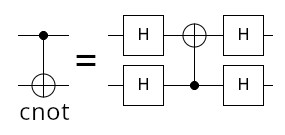

<a id="3.1.7"></a>
### 3.1.7. Continuando con el algoritmo

Centrémonos en el primer qubit. Ahora pasaremos a la notación vectorial ya que el análisis será más sencillo. Podemos expresar $\ket{\psi_3}$ usando el siguiente vector:

$$\ket{\psi_{3,q_1}} = \frac{1}{\sqrt{2}}\myvector{(-1)^{f(0)} \\ ( -1)^{f(1)}} $$

A continuación, aplicamos la compuerta $H$ al primer qubit y obtenemos el siguiente vector de estado:

\begin{align*}\ket{\psi_{4,q_1}}&=\frac{1}{\sqrt{2}}\mymatrix{rr}{ \frac{1}{\sqrt2} & \frac{1}{\sqrt2} \\ \frac{1}{\sqrt2} & -\frac{1}{\sqrt2} } \myvector{(-1)^{f(0)} \\ (-1)^{f(1)}}\\\\
&=\frac{1}{2}\myvector{ (-1)^{f(0)} + (-1)^{f(1)} \\ (-1)^ {f(0)} - (-1)^{f(1)} }
\end{align*}

Ahora consideremos los dos casos.

- $f$ es **constante**:

En este caso $ f(0) = f(1) $ entonces,

$$\ket{\psi_{4,q_1}}= \myvector{ (-1)^{f(0)} \\ 0 } = (-1)^{f(0)} \ket{0} $$

Por lo tanto, observamos $0$ con $100\%$ de probabilidad.

- $f$ es **balanceada**:

En este caso, $ f(0) \neq f(1) $ entonces,

$$\ket{\psi_{4,q_1}}= \myvector{ 0 \\ (-1)^{f(0)} } =(-1)^{f(0)} \ket{1}$$

Por tanto, observamos $1$ con $100\%$ de probabilidad.

<div class="alert alert-block alert-info">
Entonces, podemos encontrar (con 100% de certeza) si $f$ es constante o balanceada haciendo <b>una sola consulta</b> a la función $f$.

_**Nota**: Alternativamente, podríamos analizar el estado $\left(\frac{1}{\sqrt{2}}(-1)^{f(0)}\ket{0}+\frac{1}{\sqrt {2}}(-1)^{f(1)}\ket{1}\right)\ket{-}$ para cada $f$ posible y luego aplicar $H$ para ver su efecto. Por ejemplo, si $f(0)=f(1)$, entonces $\ket{\psi_3}$ se reduce a $\ket{+}\ket{-}$ de modo que después de aplicar $H$, se obtiene $ \ket{0}$._

$$ $$

El algoritmo de Deutsch demuestra que se puede resolver el mismo problema realizando sólo **1 consulta** en lugar de 2, sin cometer ningún error.

Este es uno de los primeros resultados en los que obtenemos ventaja al utilizar la computación cuántica. Pero aún no es una aceleración suficiente, existe muchos más algoritmos donde esta brecha es aún mayor.

$$ $$

<a id="3.1.8"></a>
### 3.1.8. Código en Qiskit

In [ ]:
import random

def oracle():
    tipo = random.choice(["constante", "balanceado"])  # Oráculo aleatorio
    result = QuantumCircuit(2)
    result.barrier()

    if tipo == "constante":
        
        # Aleatoriamente agregamos una compuerta NOT,
        # para que la salida se evalúe en 0 o 1,
        # es decir, de manera constante uno de los dos posibles valores
        # f(x) = 0 ó f(x) = 1
        if random.randrange(2) == 0:
            result.x(0)
            
    elif tipo == "balanceado":
        
        # Nos aseguramos de que la salida esté balanceada
        # el resultado de f(x) depende de la entrada 'x'
        # por lo que regresará 0 para una entrada y 1 para la otra
        # f(0) = 0 y f(1) = 1
        result.cx(1, 0)
        
        # y aleatoriamente la invertimos, para considerar el otro caso
        # f(0) = 1 y f(1) = 0
        if random.randrange(2) == 0:
            result.x(0)

    result.barrier()
    return result

In [ ]:
x = QuantumRegister(1, '{|x\\rangle}')
y = QuantumRegister(1, '{|y\\rangle}')
r = ClassicalRegister(1, "res")

circuit_deutsch = QuantumCircuit(y, x, r)

# Paso 1
circuit_deutsch.x(y)
circuit_deutsch.barrier()

# Paso 2
circuit_deutsch.h(y)
circuit_deutsch.h(x)

# Paso 3
circuit_deutsch.compose(oracle(), inplace=True)

# Paso 4
circuit_deutsch.h(x)

# Paso 5
circuit_deutsch.measure(x, r)

circuit_deutsch.draw(output='mpl')

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

sim_basic = BasicSimulator()                       # usamos el simulador básico

# ejecutar el circuito, una sola vez es suficiente
job_sampler = sim_basic.run(circuit_deutsch, shots=1)   

conteos = job_sampler.result().get_counts()        # obtener los conteos

# determinar que tipo de función se encontró
if list(conteos.keys())[0] == '0':
    legend = ["Función constante"]
else:
    legend = ["Función balanceada"]

plot_histogram([conteos], legend=legend)

<a id="3.2"></a>
## 3.2. Algoritmo de Deutsch – Jozsa

El **algoritmo de Deutsch-Jozsa** es un algoritmo cuántico determinista propuesto por David Deutsch y Richard Jozsa en 1992 [[Deutsch, D., Jozsa, R.](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167)]. Aunque actualmente tiene poco uso práctico, es uno de los primeros ejemplos de un algoritmo cuántico que es exponencialmente más rápido que cualquier algoritmo clásico determinista posible.

<a id="3.2.1"></a>
### 3.2.1. El problema

Se tiene una función booleana oculta $f$, conocida como *caja negra* o como **oráculo**, que toma como entrada una cadena de bits y devuelve $0$ o $1$, es decir:

$$f\big(\{x_0, x_1, x_2, \cdots\}\big)\rightarrow0 \text{ ó } 1$$

Donde cada $x_i$ es $0$ ó $1$.

La propiedad de la función booleana dada es que se _garantiza_ que sea **balanceada** o **constante**. Una función *constante* devuelve siempre $0$ o siempre $1$ para cualquier entrada, mientras que una función *balanceada* devuelve $0$ para exactamente la mitad de todas las entradas y $1$ para la otra mitad. Nuestra tarea es determinar si la función dada es balanceada o constante.

Se debe tener en cuenta que el problema de Deutsch-Jozsa es una extensión de $n$ bits del problema de Deutsch de un solo bit [[Deutsch, D.](https://royalsocietypublishing.org/doi/10.1098/rspa.1985.0070)].

Entonces, estamos generalizando nuestra función $f:\{0,1\}^n \rightarrow \{0,1\}$, lo que significa que nuestra función $f$ toma como entrada una cadena de $n$ bits referenciada con $x$ y devuelve $0$ ó $1$. En este caso, decimos que $f$ es constante si asigna cada cadena de longitud $n$ a $0$ ó $1$, y está balanceada si asigna exactamente la mitad de cadenas de bits a $0$ y la otra mitad a $1$.

Notemos que el tamaño de entrada es $n$ en lugar de $1$, esto no implica ningún cambio al implementar

$$U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x) }$$

Cuando la entrada es de $n$ bits, $\ket{x} = \ket{x_1x_2x_3...x_n}$ es un estado cuántico con $n$ qubits y $y$ es el qubit de salida único ya que el rango de $f$ es $\{0,1\}$.

De manera similar, la idea del retroceso de fase aplicará de igual manera: $ \ket{x}\ket{-} \xrightarrow{U_f} (-1)^{f(x)} \ket{x}\ket{-} $

<a id="3.2.2"></a>
### 3.2.2. Solución clásica

En el _mejor de los casos_, en una solución clásica, se necesitan dos consultas al *oráculo* para determinar si la función booleana oculta $f(x)$ es balanceada, por ejemplo si las siguientes consultas regresan el valor dado:

$$f(0, 0, 0, 0, \cdots)\rightarrow 0$$
$$f(1, 0, 0, 0, \cdots)\rightarrow 1$$

entonces sabremos que la función es *balanceada* pues estamos obteniendo dos resultados distintos.

En el **peor de los casos**, si al hacer consultas para diferentes entradas obtenemos el mismo resultado, tendríamos que revisar exactamente la mitad de las posibles entradas más una, para poder tener la certeza de que $f(x)$ es constante.

Dado que el total de posibles entradas es $2^n$, se tiene que es necesario probar con $2^{n-1}+1$ entradas para tener la certeza de que el oráculo es constante, en el _peor de los casos_.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: 
    
Para cadenas de $4$ bits, tenemos que $n=4$, entonces la cantidad de entradas será $2^4=16$.
    
Por lo que si revisamos $8$ combinaciones de las $16$ posibles y obtenemos siempre la salida igual a $0$, aún es posible que la $9^a$ combinación regrese un $1$, significando que $f(x)$ es *balanceada*.

$$f(0,0,0,0)\rightarrow 0$$
$$f(0,0,0,1)\rightarrow 0$$
$$f(0,0,1,0)\rightarrow 0$$
$$f(0,0,1,1)\rightarrow 0$$
$$f(0,1,0,0)\rightarrow 0$$
$$f(0,1,0,1)\rightarrow 0$$
$$f(0,1,1,0)\rightarrow 0$$
$$f(0,1,1,1)\rightarrow 0$$
$$$$
$$f(1,0,0,0)\rightarrow 1$$

Probabilísticamente hablando, este es un evento muy improbable. De hecho, si obtenemos el mismo resultado continuamente en sucesión, podemos expresar la probabilidad de que la función sea constante en función de $k$ entradas como,

$$P_{\text{constante}}(k)=1-\frac{1}{2^{k-1}} ~~~~~~~~~~~~~~ \text{para } 1<k\leq 2^{n-1}$$

Siendo realistas, podríamos optar por truncar nuestro algoritmo clásico de manera temprana (sin revisar todas las posibles entradas), digamos si tuviéramos más de cierto porcentaje de confianza. Pero si queremos estar $100\%$ seguros, necesitaríamos verificar $2^{n-1}+1$ entradas.

<a id="3.2.3"></a>
### 3.2.3. Solución cuántica

Usando una computadora cuántica, podemos resolver este problema con un $100\%$ de confianza después de **una sola llamada a la función $f(x)$**, siempre que tengamos la función $f$ implementada como un **oráculo cuántico**, que asigna el estado $\ket{x}\ket{y}$ al estado $\ket{x}\ket{y\oplus f(x)}$, donde $\oplus$ es la [suma módulo 2](https://en.wikipedia.org/wiki/Modular_arithmetic) (que también se puede ver como una compuerta $XOR$ cuántica implementada como una compuerta $CNOT$).

A continuación se muestra el circuito genérico para el algoritmo de Deutsch-Jozsa.

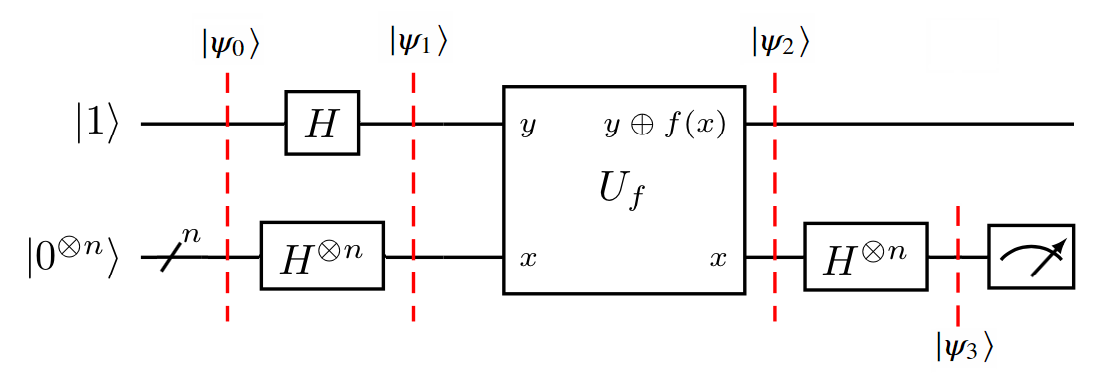

<a id="3.2.4"></a>
### 3.2.4. Algoritmo

Veamos los pasos y por cada uno revisemos su implementación en Qiskit, el ejemplo en código será para $n=3$, por lo que tendremos un total de $n+1=4$ qubits (el qubit de hasta arriba es el auxiliar $y$).

Antes de ver cada paso, generemos dos oráculos, uno constante y otro balanceado, para comprobar que el algoritmo funciona correctamente.

In [ ]:
n = 3           # cantidad de bits para la función f

In [ ]:
from qiskit import QuantumCircuit
import numpy as np


def dj_oraculo(tipo, n):

    x = QuantumRegister(n, '{x}')
    y = QuantumRegister(1, '{|y\\rangle}')

    oraculo = QuantumCircuit(y, x)

    oraculo.barrier()


    if tipo == "constante":
        # en este caso, la entrada no tiene efecto en la salida, por lo que simplemente
        # configuramos aleatoriamente el qubit auxiliar en 0 o 1:
        output = np.random.randint(2)
        if output == 1:
            oraculo.x(y)             # aplicar X al qubit auxiliar 
                                     # (un mismo resultado para todas las entradas)

    elif tipo == "balanceado":
        # podemos crear un oráculo balanceado usando CNOTs 
        # con cada qubit de entrada como control y el qubit auxiliar como objetivo.
        # f(x) = x_1 XOR x_2 XOR x_3
        # Podemos variar los estados de entrada que dan 0 o 1
        # encerrando algunos de los controles con compuertas X. 
        # Primero elijamos una cadena binaria de longitud n que dicte qué controles ajustar:

        b_str = "100"                # cadena para 3 qubits de entrada

        # agregar las compuertas X en la posición donde hay un 1
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oraculo.x(qubit + 1)   # el qubit q0 es el auxiliar (el de hasta arriba), lo ignoramos
        
        oraculo.barrier()

        # Ahora, aplicamos las compuertas CNOT, usando cada qubit de entrada como control 
        # y el qubit auxiliar como objetivo:
        for qubit in range(1, n + 1):  # el primer registro cuántico va desde q[1] hasta q[n]
            oraculo.cx(qubit, 0)     # el objetivo es el qubit auxiliar q[0] (segundo registro)

        oraculo.barrier()

        # finalmente, aplicamos compuertas X para terminar de envolver los controles:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oraculo.x(qubit+1)   # el qubit q0 es el auxiliar (el de hasta arriba)


    oraculo.barrier()

    return oraculo

In [ ]:
from qiskit import QuantumCircuit
import numpy as np


#---------------------
## Oráculo Constante
#---------------------

const_oraculo = dj_oraculo('constante', n)

const_oraculo.draw('mpl')

In [ ]:
#---------------------
## Oráculo Balanceado
#---------------------

balan_oraculo = dj_oraculo('balanceado', n)

balan_oraculo.draw('mpl')

#### Paso 1

Se preparan dos registros cuánticos. El primero en un registro de $n$ qubits inicializado en $\ket{0}^{\otimes n}$, el segundo registro es un qubit inicializado en $\ket{1}$,

$$\ket{\psi_0} = \ket{0}^{\otimes n} \, \ket{1}$$

In [ ]:
x = QuantumRegister(n, '{x}')
y = QuantumRegister(1, '{|y\\rangle}')
r = ClassicalRegister(n, "res")

dj_circuit = QuantumCircuit(y, x, r)         # n+1 = 4 qubits, n = 3 bits clásicos

dj_circuit.x(y)                              # colocar el qubit q0 (segundo registro, 'y') 
                                             # en el estado |1>
dj_circuit.barrier()
dj_circuit.draw('mpl')

#### Paso 2

Se aplican compuertas Hadamard a cada qubit,

$$\ket{\psi_1} = \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1} \ket{x} \otimes \ket{-}$$

$$\ket{\psi_1}=\frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \, \ket{x} \, \big(\ket{0}-\ket{1}\big)$$

In [ ]:
# Aplicar las compuertas H al primer registro (el de la izquierda, 'x')
dj_circuit.h(x)

# Aplicar H al segundo registro (el de la derecha, 'y'), lo que hará: H|1> = |->
dj_circuit.h(y)

dj_circuit.draw('mpl')

#### Paso 3

Aplicar el oráculo al estado $\ket{x}\ket{y}$ obteniendo el estado $\ket{x}\ket{y\oplus f(x)}$, es decir,

$$
\begin{aligned}
\ket{\psi_2}&=\frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \, \ket{x} \, \big(\ket{0\oplus f(x)}-\ket{1\oplus f(x)}\big)\\
&=\frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \, \ket{x} \, \big(\ket{f(x)}-\ket{1\oplus f(x)}\big)\\
&=\frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \, \ket{x} \, \big(\ket{0}-\ket{1}\big)\\
\end{aligned}
$$

ya que para cada $x$, la función $f(x)$ es un $0$ o un $1$.

Vamos a crear un circuito cuántico para cada tipo de oráculo:

In [ ]:
# generemos un circuito con el oráculo constante
dj_circ_constante = dj_circuit.copy().compose(const_oraculo)

# generemos un circuito con el oráculo balanceado
dj_circ_balanceado = dj_circuit.copy().compose(balan_oraculo)


dj_circ_balanceado.draw('mpl')

#### Paso 4

En este punto, el segundo registro (que es de un qubit y está en el estado $\ket{-}$) puede ser ignorado, pues solo interesan las mediciones del primer registro (de $n$ qubits), el estado en el que nos fijaremos es el siguiente,

$$\ket{\psi_2,r_1}=\frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \, \ket{x}$$

Se aplican compuertas Hadamard a cada qubit del primer registro,

$$
\begin{aligned}
\ket{\psi_3}&=\frac{1}{2^{n}}\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \, \left[\sum_{j=0}^{2^n-1} \, \big(-1\big)^{x\cdot j} \, \ket{j} \right]\\
&=\frac{1}{2^{n}}\sum_{j=0}^{2^n-1} \, \left[\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \big(-1\big)^{x\cdot j}\right] \, \ket{j}\\
\end{aligned}
$$

donde $x\cdot j=x_0j_0\oplus x_1j_1\oplus \cdots\oplus x_{n-1}j_{n-1}$ es la suma del producto bit a bit.

In [ ]:
#---------------------
## Oráculo Balanceado
#---------------------

# Aplicar nuevamente compuertas H al primer registro (en el circuito que ya tiene el oráculo)
dj_circ_balanceado.h(x)
    
dj_circ_balanceado.barrier()
dj_circ_balanceado.draw('mpl')

In [ ]:
#---------------------
## Oráculo Constante
#---------------------

# Aplicar nuevamente compuertas H al primer registro (en el circuito que ya tienen el oráculo)
dj_circ_constante.h(x)

dj_circ_constante.barrier()
dj_circ_constante.draw('mpl')

#### Paso 5

Medir el primer registro (el de $n$ qubits, el llamado $x$).

Notemos que la probabilidad para que un estado $\ket{k}$ sea medido, está dada por,

$$\left|\frac{1}{2^{n}}\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \big(-1\big)^{x\cdot k}\right|^2$$

En particular para el caso $k=0$, o escrito en forma de estado cuántico: $\ket{k}=\ket{0}^{\otimes n}$, la probabilidad sería,

$$\left|\frac{1}{2^{n}}\sum_{x=0}^{2^n-1} \, \big(-1\big)^{f(x)} \right|^2$$

que será igual a $1$ si $f(x)$ es **constante** (habrá _interferencia constructiva_), e igual a $0$ si $f(x)$ es **balanceada** (_habrá interferencia destructiva_).

$$$$

- Si $f$ es **constante**, la medición será: $$=\ket{00\cdots 00}=\ket{0}^{\otimes n}$$ (todos ceros)

- Si $f$ es **balanceada**, la medición será: $$=_{ejemplo}\ket{11\cdots 11}\neq \ket{0}^{\otimes n}$$ (diferente de _todos ceros_, almenos habrá un $1$)

In [ ]:
#---------------------
## Oráculo Balanceado
#---------------------

# agregamos mediciones al primer registro ('x')
dj_circ_balanceado.measure(x, r)
    
dj_circ_balanceado.draw('mpl')

In [ ]:
#---------------------
## Oráculo Constante
#---------------------

# agregamos mediciones al primer registro ('x')
dj_circ_constante.measure(x, r)
    
dj_circ_constante.draw('mpl')

#### Simulación

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

#---------------------
## Oráculo Constante
#---------------------

sim_basic = BasicSimulator()                       # usamos el simulador básico

# ejecutar el circuito, una sola vez es suficiente
job_sampler = sim_basic.run(dj_circ_constante, shots=1)

conteos = job_sampler.result().get_counts()        # obtener los conteos

legend = ["Función constante"]
plot_histogram([conteos], legend=legend)

In [ ]:
#---------------------
## Oráculo Balanceado
#---------------------

sim_basic = BasicSimulator()                       # usamos el simulador básico

# ejecutar el circuito, una sola vez es suficiente
job_sampler = sim_basic.run(dj_circ_balanceado, shots=1)

conteos = job_sampler.result().get_counts()        # obtener los conteos

legend = ["Función balanceada"]
plot_histogram([conteos], legend=legend)

<a id="3.2.5"></a>
### 3.2.5. ¿Por qué funciona?

#### Oráculo Constante

Cuando el oráculo es constante, no tiene efecto (hasta una fase global) en los qubits de entrada, y los estados cuánticos antes y después de consultar el oráculo son los mismos. Dado que la compuerta $H$ es su propio inverso, en el *paso 4* invertimos el *paso 2* para obtener el estado cuántico inicial $\ket{00\cdots 0}$ en el primer registro.

$$H^{\otimes n}\mymatrix{r}{ 1 \\ 0 \\ 0 \\ \vdots \\ 0 }=\frac{1}{\sqrt{2^n}}\mymatrix{r}{ 1 \\ 1 \\ 1 \\ \vdots \\ 1 }\xrightarrow{\text{después de } U_f}H^{\otimes n}\frac{1}{\sqrt{2^n}}\mymatrix{r}{ 1 \\ 1 \\ 1 \\ \vdots \\ 1 }=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ \vdots \\ 0 }$$

$$$$
$$$$

#### Oráculo Balanceado

Después del *paso 2*, el registro de entrada es una superposición igual de todos los estados en la base computacional. Cuando el oráculo es balanceado, el [retroceso de fase (phase kickback)](https://qiskit.org/textbook/ch-gates/phase-kickback.html) agrega una fase negativa a exactamente la mitad de estos estados:

$$U_f\frac{1}{\sqrt{2^n}}\mymatrix{r}{ 1 \\ 1 \\ 1 \\ \vdots \\ 1 }=\frac{1}{\sqrt{2^n}}\mymatrix{r}{ -1 \\ 1 \\ -1 \\ \vdots \\ 1 }$$

El estado cuántico después de consultar el oráculo es ortogonal al estado cuántico antes de consultar el oráculo. Por lo tanto, en el *paso 4*, al aplicar las compuertas $H$, debemos terminar con un estado cuántico que sea ortogonal a $\ket{00\cdots 0}$. Esto significa que nunca debemos medir el estado cero.

<a id="3.2.6"></a>
### 3.2.6. [Extra] Descripción del oráculo balanceado y resultados para $n = 3$

A continuación, analicemos el código utilizado para implementar el oráculo balanceado para el **algoritmo de Deutsch-Jozsa** con $n = 3$ qubits de entrada y un qubit auxiliar.

$$ $$
#### Funcionamiento del Oráculo

**1. Configuración Inicial:**

- Qubits de Entrada: $x_0, x_1, x_2$ (qubits 1, 2 y 3 respectivamente).
- Qubit Auxiliar: $y$ (qubit 0).
- Cadena `b_str = "100"`: Indica dónde aplicar compuertas $X$ al inicio y al final.

**2. Aplicación de las compuertas $X$ iniciales:**

- Se aplican compuertas $X$ a los qubits de entrada donde `b_str` tiene `'1'`:
  - Qubit 1 ($x_0$): `b_str[0] = '1'` $\rightarrow$ Aplicar $X$.
  - Qubit 2 ($x_1$): `b_str[1] = '0'` $\rightarrow$ No aplicar $X$.
  - Qubit 3 ($x_2$): `b_str[2] = '0'` $\rightarrow$ No aplicar $X$.

**3. Aplicación de las compuertas $CNOT$:**

- Se aplican compuertas $CNOT$ desde cada qubit de entrada al qubit auxiliar:
  - **Control:** Qubits 1, 2 y 3.
  - **Objetivo:** Qubit auxiliar (qubit 0).

**4. Aplicación de las compuertas $X$ finales:**

- Se vuelven a aplicar compuertas $X$ a los mismos qubits de entrada donde `b_str` tenía `'1'` para restaurar sus estados originales.

$$ $$
#### Cálculo de $f(x)$ para cada combinación de entrada

La función implementada por el oráculo es:

$$f(x) = \underbrace{(x_0 \oplus b_0)}_{x_0'} \oplus \underbrace{(x_1 \oplus b_1)}_{x_1'} \oplus \underbrace{(x_2 \oplus b_2)}_{x_2'}$$

Donde:

- `b_0 = 1` (porque `b_str[0] = '1'`).
- `b_1 = 0` (porque `b_str[1] = '0'`).
- `b_2 = 0` (porque `b_str[2] = '0'`).

Simplificando, obtenemos:

$$ f(x) = x_0' \oplus x_1' \oplus x_2' $$

Es decir, $f(x)$ es la **paridad** de los bits de entrada combinados con la cadena `b_str`.

$$ $$
#### Tabla de Resultados

Ahora veamos una tabla con todas las combinaciones posibles de $x = x_2 x_1 x_0$y el cálculo de $f(x)$:

| $x_2$ | $x_1$ | $x_0$ | $x_0' = x_0 \oplus b_0$ | $x_1' = x_1 \oplus b_1$ | $x_2' = x_2 \oplus b_2$ | $f(x) = x_0' \oplus x_1' \oplus x_2'$ |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|   0   |   0   |   0   |   1   |   0   |   0   |   1   |
|   0   |   0   |   1   |   0   |   0   |   0   |   0   |
|   0   |   1   |   0   |   1   |   1   |   0   |   0   |
|   0   |   1   |   1   |   0   |   1   |   0   |   1   |
|   1   |   0   |   0   |   1   |   0   |   1   |   0   |
|   1   |   0   |   1   |   0   |   0   |   1   |   1   |
|   1   |   1   |   0   |   1   |   1   |   1   |   1   |
|   1   |   1   |   1   |   0   |   1   |   1   |   0   |

Nota: $\oplus$ representa la operación XOR ([suma módulo 2](https://es.wikipedia.org/wiki/Aritm%C3%A9tica_de_m%C3%B3dulo_2)).

$$ $$
La función es **balanceada** porque devuelve $0$ para exactamente la mitad de las entradas y $1$ para la otra mitad.

La elección de la cadena `b_str = "100"` y la aplicación de compuertas $X$ antes y después de las compuertas $CNOT$ es una técnica utilizada para construir funciones balanceadas específicas en el algoritmo de Deutsch-Jozsa. Modificando `b_str`, se pueden implementar diferentes funciones balanceadas.

<a id="4"></a>
# 4. Recordatorio: Hadamard

Sabemos que aplicando Hadamard al estado $\ket{0}$, obtenemos $\frac{1}{\sqrt{2}}\left(\ket{0}+\ket{1}\right)$, y aplicando Hadamard al estado $\ket{1}$, obtenemos $\frac{1}{\sqrt{2}}\left(\ket{0}-\ket{1}\right)$.

Ahora sea $x_1 \in \{0,1\}$. Consideremos la siguiente expresión.

$$H\ket{x_1} = \frac{1}{\sqrt{2}} \left( \ket{0} + (-1)^{x_1} \ket{1} \right) = \frac{1 }{\sqrt{2}}\sum_{z\in\{0,1\}}(-1)^{x_1z}\ket{z}$$

Cuando $x_1=0$, entonces tenemos un signo más y cuando $x_1=1$, entonces tenemos un signo menos. Entonces, podemos comenzar a expresar el estado que obtenemos después de aplicar Hadamard a un qubit arbitrario usando la expresión anterior.

¿Qué sucede cuando aplicamos $H^{\otimes n}$ a un registro de $n$-qubits? Podemos adivinar intuitivamente que aplicar el operador a un registro con todos $0$s produciría una superposición igual de todos los números naturales posibles como:

$$ H^{\otimes n} \ket{0}^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} \ket{x} $$

¿Qué pasa con los estados arbitrarios? Entonces, usando la ecuación anterior podemos escribir la siguiente expresión:

$$
\begin{aligned}
H^{\otimes n} \ket{x} &= \left(\frac{1}{\sqrt{2}}\sum_{z_1\in\{0,1\}}(-1)^{ x_1z_1}\ket{z_1}\right) \otimes \left(\frac{1}{\sqrt{2}}\sum_{z_2\in\{0,1\}}(-1)^{x_2z_2}\ket{z_2} \right) \otimes \cdots \otimes \left(\frac{1}{\sqrt{2}}\sum_{z_n\in\{0,1\}}(-1)^{x_nz_n} \ket{z_n}\right)\\\\
&= \frac{1}{\sqrt{2^n}} \sum_{z=0}^{2^n-1}(-1)^{x \cdot z} \ket{z}
\end{aligned}
$$

donde $\ket{x}=\ket{x_1\cdots x_n}$, $\ket{z}=\ket{z_1\cdots z_n}$ y $ x \cdot z $ es la operación producto punto (bit a bit) módulo 2, es decir,

$$ x \cdot z = \sum_{i=1}^n x_i \cdot z_i \pmod 2 $$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: 

$$ $$

Sea $\ket{x}=\ket{5}=\ket{101}$, aplicar $H^{\otimes 3}$ a $\ket{x}$

Usamos la fórmula: $H^{\otimes 3} \ket{x} =\frac{1}{\sqrt{2^n}} \sum\limits_{z=0}^{2^n-1}(-1)^{x \cdot z} \ket{z}$

Notemos que

<table>
    <tr>
        <td align="center">$z$</td>
        <td align="center">$x\cdot z$</td>
        <td align="center">$(-1)^{x\cdot z}$</td>
    </tr>
    <tr>
        <td align="center">$0\to 000$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$1\to 001$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$2\to 010$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$3\to 011$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$4\to 100$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$5\to 101$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$6\to 110$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$7\to 111$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
</table>

Donde por ejemplo, como $x=101$ y si $z=110$, entonces 

$$x \cdot z = 101 \cdot 110 =\sum_{i=1}^3 x_i \cdot z_i \pmod 2 = \left(1\cdot 1 + 0\cdot 1 + 1\cdot 0\right) \pmod 2 = 1 \pmod 2 = 1$$

De este modo, tenemos que,

$$
H^{\otimes 3} \ket{101} = \frac{1}{\sqrt{8}}\Big(\ket{000}-\ket{001}+\ket{010}-\ket{011}-\ket{100}+\ket{101}-\ket{110}+\ket{111}\Big)
$$

<a id="5"></a>
# 5. Práctica 4

La Tarea deberá ser entregada en un Jupyter notebook, debe ser uno nuevo (no se puede usar este), el archivo debe ser subido al Google Classroom.

1. Determina de qué tipo de función se trata: _constante_ o _balanceada_:
    1. Ejecuta la siguiente celda de código, esta definirá una función llamada `oracledj(n)` que recibe `n` y devuelve un circuito cuántico aleatorio con `n+1` qubits correspondientes a una función constante o balanceada.
       - `oracledj(n)` representa $U_f$ en el algoritmo de Deutsch – Jozsa.
       - Dibuja el circuito que regresa la función `oracledj(n)`.
    2. Usa $n=4$. Implementa el algoritmo de Deutsch – Jozsa completo para decidir si $f$ es constante o balanceada.
       - Considera que el qubit de más a la izquierda (en este caso $q_4$) es el qubit auxiliar.
           - Nota que `oracledj(n)` tiene el qubit auxiliar del otro lado comparado con el ejemplo visto en este notebook (Lab4, sección 3).
       - Comprueba la estructura del circuito de $U_f$ dibujando tu circuito. ¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?

##### Celda oculta que define la función `oracledj(n)`

No olvides ejecutar la siguiente celda de código ([ofuscado](https://es.wikipedia.org/wiki/Ofuscaci%C3%B3n#Motivaci%C3%B3n)) para cargar la función del Oracle.

In [ ]:
exec(bytes.fromhex('0a696d706f72742072616e646f6d0a66726f6d207169736b697420696d706f7274205175616e74756d436972637569740a0a646566206f7261636c65646a286e293a0a20202020726573756c74203d205175616e74756d43697263756974286e2b31290a20202020726573756c742e6261727269657228290a0a2020202074797065203d2072616e646f6d2e63686f696365285b22636f6e7374616e74222c202262616c616e636564225d290a2020202069662074797065203d3d2022636f6e7374616e74223a0a202020202020202069662072616e646f6d2e72616e6472616e6765283229203d3d20303a0a202020202020202020202020726573756c742e78286e290a20202020656c73653a0a2020202020202020636f6e74726f6c203d2072616e646f6d2e72616e6472616e6765286e290a2020202020202020726573756c742e637828636f6e74726f6c2c206e290a202020202020202069662072616e646f6d2e72616e6472616e6765283229203d3d20303a0a202020202020202020202020726573756c742e78286e290a0a20202020726573756c742e6261727269657228290a2020202072657475726e20726573756c740a20202020').decode('utf-8'))

#### 

2. Implementa el algoritmo de Deutsch usando `spinqit`. Simúlalo.
    1. Escribe el código en `spinqit`.
       - Hay ejemplos de código con `spinqit` en el notebook del Lab2.
       - El algoritmo de Deutsch está completo en este mismo notebook (Lab4), solo hay que escribirlo ahora en `spinqit`.
           - Elije un solo oráculo (constante o balanceado).
    2. Realiza la simulación en tu computadora usando `BasicSimulatorConfig` (como en los ejemplos).
       - Recuerda que debes tener un ambiente con Python 3.8 y el framework `spinqit` instalado.
    4. Debes mostrar los resultados de este ejercicio 2 en el mismo notebook en el que están los resultados del ejercicio 1.
       - Puedes hacer el ejercicio 1 en un ambiente de conda y guardar el notebook.
       - Luego abrir el notebook de nuevo en un segundo ambiente y realizar este ejercicio 2 en ese segundo ambiente, solo no toques las celdas de tus respuesta del ejercicio 1.
</br>

3. **[Opcional]** Aplica $H^{\otimes 4}$ a $\ket{15}$. ¿Cuál es el resultado?
    1. Escribe tu respuesta mostrando todo el procedimiento.
       - El ejemplo en la sección 4 de este notebooks (Lab4) será de mucha utilidad.
       - Esta respuesta debe estar en el mismo notebook que entregues con los ejercicios 1 y 2.
    2. Usa $\LaTeX$ para escribir las expresiones matemáticas.
       - Este y los demás notebooks tienen ejemplos de cómo se escriben estas expresiones, solo da doble click en la celda que quieras revisar.
       - En la segunda celda de este notebook hay unas definiciones que pueden ser de utilidad, cópialas en una celda al inicio de tu notebook para que las puedas usar.
</br>

**Nota**: Los ejercicios opcionales sumarán punto(s) extra en el total de tareas, sino se realizan **no** restarán puntos al total de tareas.

##### **Nota**: Tarea individual.